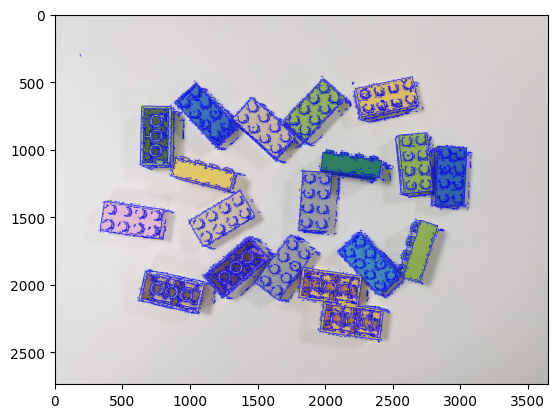

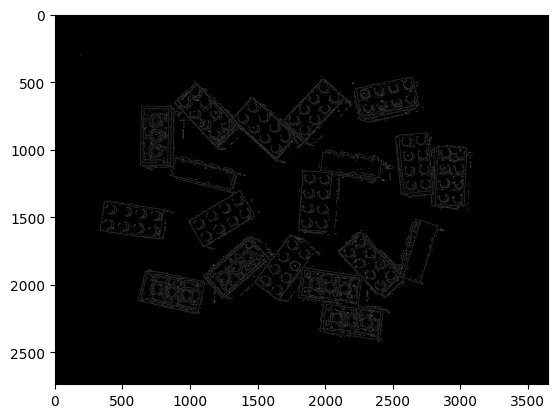

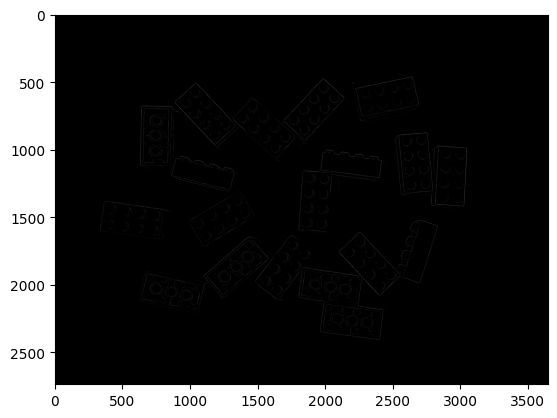

In [4]:

import numpy as np
from matplotlib import pyplot as plt
import cv2

def gamma_correction(image, gamma=1.0):
    # 构建查找表，实现伽马校正
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    # 应用伽马校正
    return cv2.LUT(image, table)

# Load your image
image = cv2.imread("../test_images/5.jpg")

# 图像预处理
# image = cv2.GaussianBlur(image, (7, 7), 0)
image = gamma_correction(image, gamma=1.5)

# 创建EdgeBoxes
edge_detection = cv2.ximgproc.createStructuredEdgeDetection("model.yml.gz")
rgb_im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
edges = edge_detection.detectEdges(np.float32(rgb_im) / 255.0)

# 非极大值抑制
orimap = edge_detection.computeOrientation(edges)
edges = edge_detection.edgesNms(edges, orimap)

_, thresh = cv2.threshold(edges, 0.01, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    cv2.drawContours(image, [contour], -1, (255, 0, 0), 3)

# Show the image with boxes
plt.figure(1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.figure(2)
plt.imshow(thresh, cmap='gray')
plt.figure(3)
plt.imshow(edges, cmap='gray')
cv2.imwrite('testEdges.jpg', edges)
plt.show()


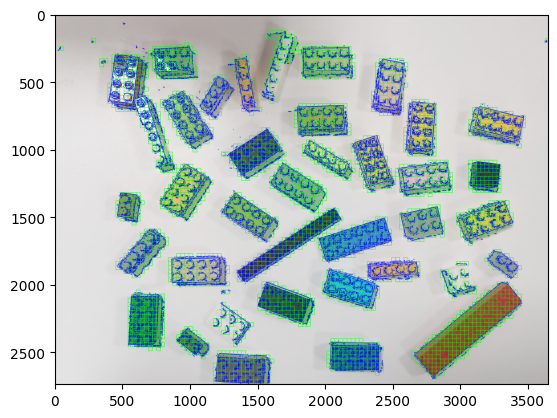

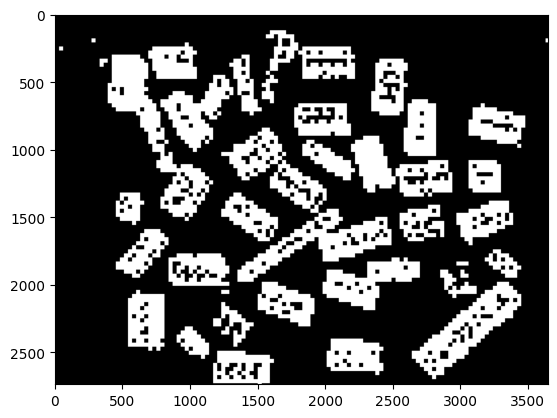

In [25]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

# 参数
block_size = 0             # 设置方块的大小
non_zero_threshold = 20     # 设置非零像素个数的阈值

height, width = thresh.shape
marked_image = image.copy()
mask = np.zeros_like(thresh)

# 遍历图像中的每个方块
for y in range(0, height, block_size):
    for x in range(0, width, block_size):
        block = thresh[y:y+block_size, x:x+block_size]
        # 判断方块里是否有积木
        if cv2.countNonZero(block) > non_zero_threshold: 
            cv2.rectangle(marked_image, (x, y), (x + block_size, y + block_size), (0, 255, 0), 2)
            mask[y:y+block_size, x:x+block_size] = 255

# Show the image with marked blocks
plt.figure(1)
plt.imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
plt.figure(2)
plt.imshow(mask, cmap='gray')
plt.show()



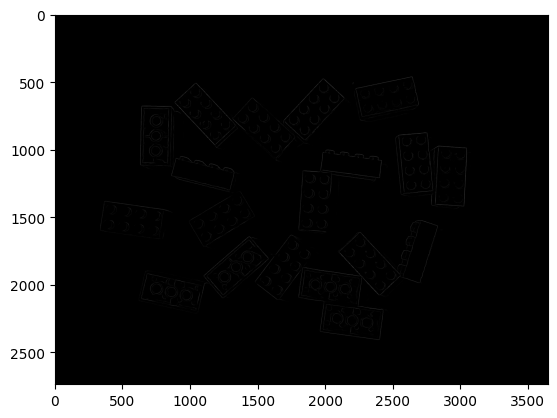

In [8]:
# 运行结果处理
import numpy as np
from matplotlib import pyplot as plt
import cv2

min_val = np.min(edges)
max_val = np.max(edges)

# 线性归一化到 0-255
edges_gray = ((edges - min_val) / (max_val - min_val)) * 255

edges_gray = edges_gray.astype(np.uint8)

cv2.imwrite('edges.jpg', edges_gray)

plt.figure(1)
plt.imshow(edges_gray, cmap='gray')
plt.show()